In [31]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [32]:
##Inputs:
#path
filename = r"C:\Users\roger\PycharmProjects\algotrading\self_data\btcusd.csv"
#Expected Columns:
#time  open  close  high  low  volume

#moving average vals
short_ma_val = 50
long_ma_val = 1000

In [33]:
#defining variables
price_dict = {}
trade_log = []
date_log = []
master_journal = []
long = False
short = False
id_counter = 1
trade_counter = 0

In [34]:
with open(filename, 'r+', encoding= 'utf-8') as file:
    reader = csv.reader(file)
    for row in reader:
        price_dict[id_counter] = row
        id_counter += 1

In [35]:
def moving_average_price(index, periods):
    periods_array = []
    for i in range(0, periods, 10):
        periods_array.append(float(price_dict[index - i][1]))
    return(sum(periods_array) / periods)

In [36]:
#Optional grid calculation
# for short_ma in range(short_ma_range[0],short_ma_range[1],short_ma_range[2]):
#     for long_ma in range(long_ma_range[0],long_ma_range[1],long_ma_range[2]):
log_journal = []
price_journal = []

#Iterates through each tick open to flip short when small sma < large sma and long vice versa.
for key in list(price_dict.keys())[long_ma_val + 1:-long_ma_val - 1]:
    small_ma_price = moving_average_price(key, short_ma_val)
    large_ma_price = moving_average_price(key, long_ma_val)
    if long or short:
        if long:
            if small_ma_price < large_ma_price:
                long_exit = float(price_dict[key][1])
                outcome = ((long_exit - long_entry) / long_entry)
                log_journal.append(outcome)
                price_journal.append(long_exit)
                long = False
                short = True
                short_entry = long_exit
            continue
        else:
            if small_ma_price > large_ma_price:
                short_exit = float(price_dict[key][1])
                outcome = ((short_entry - short_exit) / short_entry)
                log_journal.append(outcome)
                price_journal.append(short_exit)
                long = True
                short = False
                long_entry = short_exit
    else:
        if small_ma_price > large_ma_price:
            long_entry = float(price_dict[key][1])
            long = True
        else:
            short_entry = float(price_dict[key][1])
            short = True
# master_journal.append([sum(log_journal) / len(log_journal), short_ma, long_ma])
# print(master_journal[0])

In [37]:
best = max(log_journal)
worst = min(log_journal)
mean = np.mean(log_journal)
print('Highest HPR:', best)
print('Worst Drawdown:', worst)
print('Mean:', mean)


Highest HPR: 0.6547076505381556
Worst Drawdown: -0.20521379748847562
Mean: 0.0002100312935988019


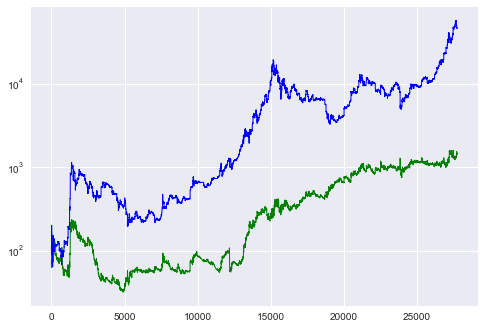

In [44]:
starting_equity = float(price_dict[2][1])
equity = starting_equity
comission_basis = 0
equity_journal = []
for trade in log_journal:
    effect = trade + 1
    equity = equity * (effect-comission_basis)
    equity_journal.append(equity)
plt.style.use('seaborn')
plt.plot(equity_journal, linestyle = 'solid', linewidth= 1, color='g')
plt.yscale('log')
plt.plot(price_journal, linestyle = 'solid', linewidth= 1, color='b')
plt.yscale('log')
plt.show()
#Showing equity curve (green) vs asset price (blue)

In [ ]:
#On a comission-free basis, strategy has performed with slight alpha on BTCUSD 1m but underperformed buy & hold.
#The slight edge completely breaks down when realistic exchange fees are assumed.

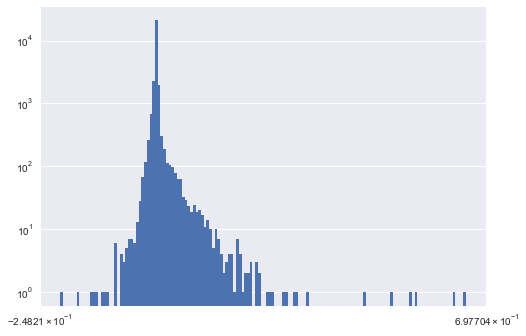

In [39]:
#Showing distribution of HPRs
plt.hist(log_journal, bins=150)
plt.xscale('symlog')
plt.yscale('log')
plt.show()